In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import datetime as dt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#ill check if index are in order
df = df.reset_index(drop=True)

In [ ]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |  Very inconsiderate PA annou...      5  2024-04-25   
1  ✅ Trip Verified |  Absolutely terrible, lost m...      1  2024-04-22   
2  ✅ Trip Verified |  We booked premium economy r...      1  2024-04-20   
3  ✅ Trip Verified |  We chose Rotterdam and Lond...      1  2024-04-12   
4  ✅ Trip Verified | The entire booking and ticke...      6  2024-04-10   

          country  verified                                             corpus  
0  United Kingdom      True  inconsiderate pa announcement made purser appe...  
1  United Kingdom      True  absolutely terrible lost luggage flight delive...  
2   United States      True  booked premium economy round trip phoenix zuri...  
3     Netherlands      True  chose rotterdam london city airport convenienc...  
4   United States      True  entire booking ticketing experience stressful ...

Finding out the average rating reviews customers give to british Airways

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviews   7000 non-null   object
 1   stars     7000 non-null   int64 
 2   date      7000 non-null   object
 3   country   7000 non-null   object
 4   verified  7000 non-null   bool  
 5   corpus    7000 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 280.4+ KB


In [ ]:
df.stars.mean()

4.287142857142857

In [ ]:
df.columns

Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')

Finding out the count of each rating to British Airways

Text(0.5, 0.98, 'Counts for each ratings')

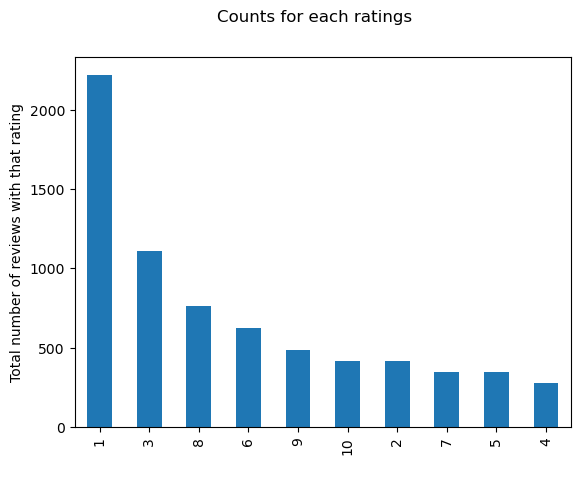

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel(" ")
plt.ylabel("Total number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings

Stars  total_counts  pct_values
0      1          2218       31.69
1      3          1111       15.87
2      8           763       10.90
3      6           622        8.89
4      9           484        6.91
5     10           416        5.94
6      2           414        5.91
7      7           348        4.97
8      5           347        4.96
9      4           277        3.96

Text(0.5, 1.0, 'Counts for each ratings')

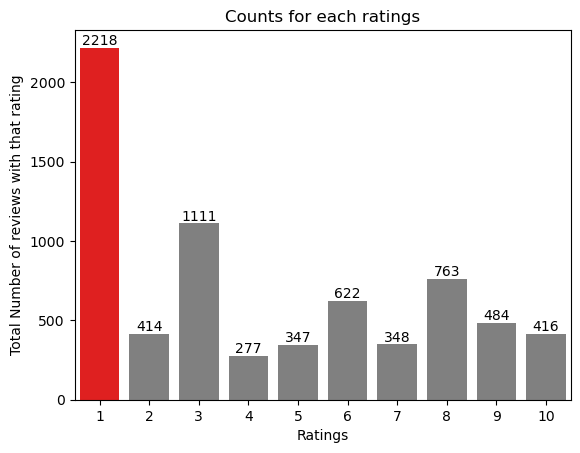

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
plt.savefig('saved_figure4.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

19 unique countries


Which country most review comes from?

In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

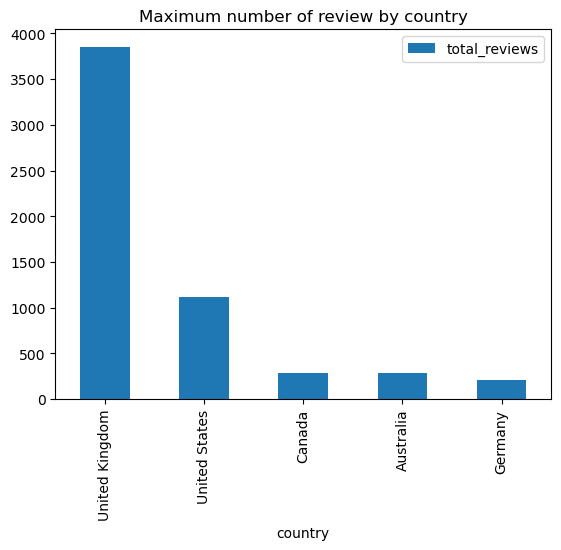

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")
plt.savefig('saved_figure2.png', bbox_inches = 'tight')

Which country Provided the higest rating

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

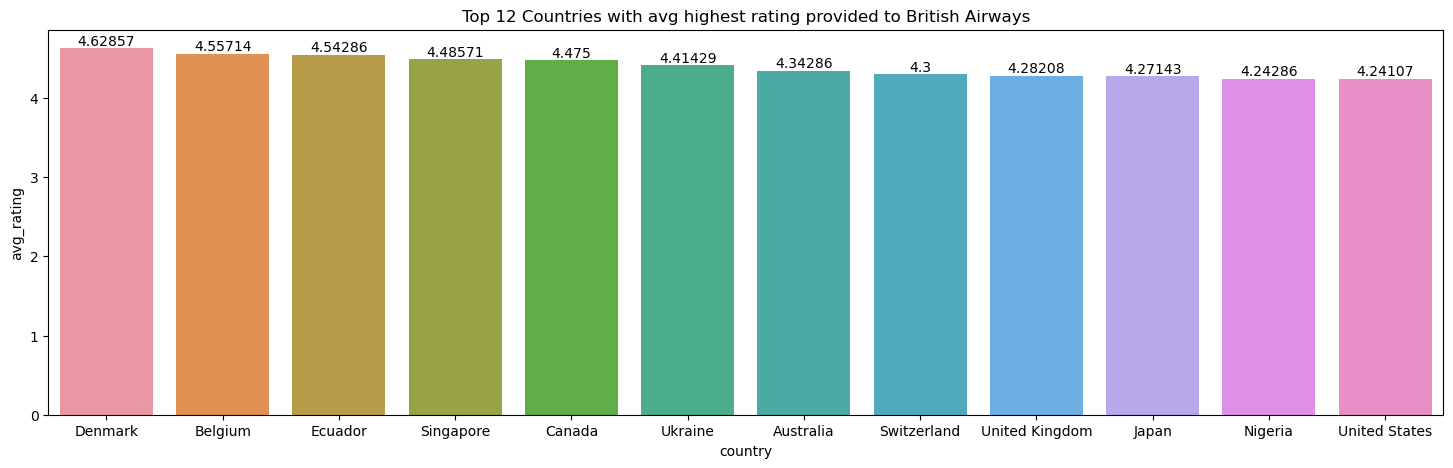

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [ ]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

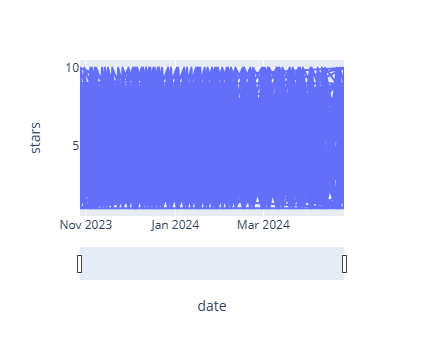

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

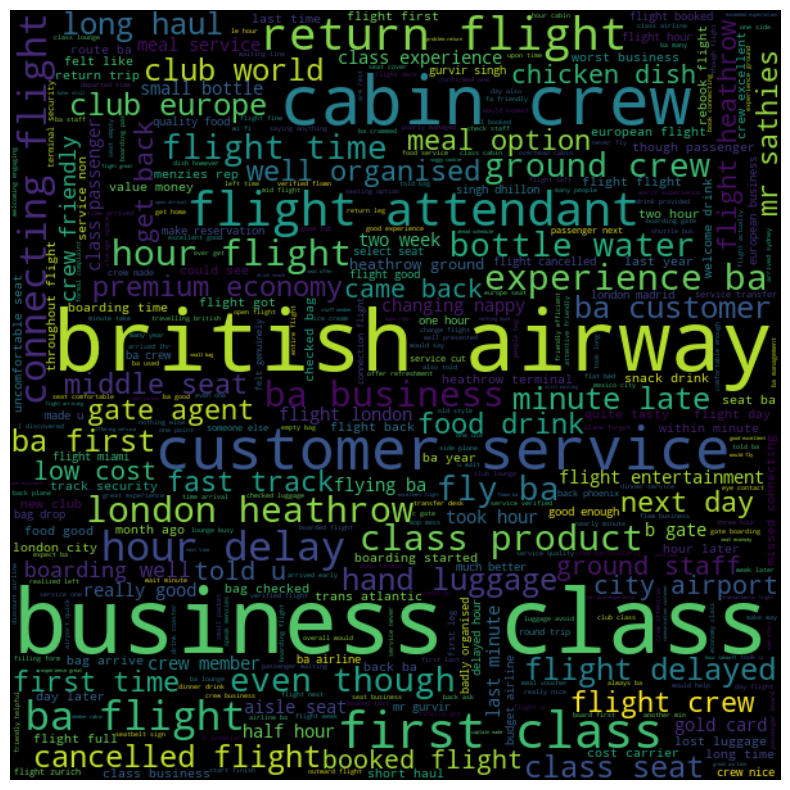

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

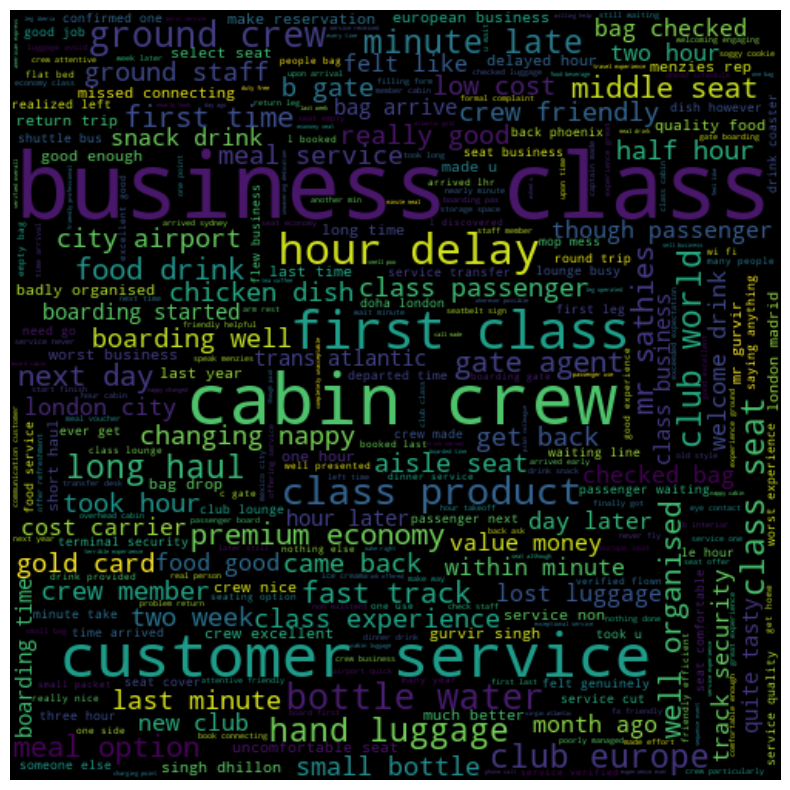

<Figure size 640x480 with 0 Axes>

In [ ]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('saved_figure3.png')

Word Frequency

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])
new_words = [word for word in words if word not in stopwords]
nlp_words=FreqDist(new_words).most_common(20)
#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

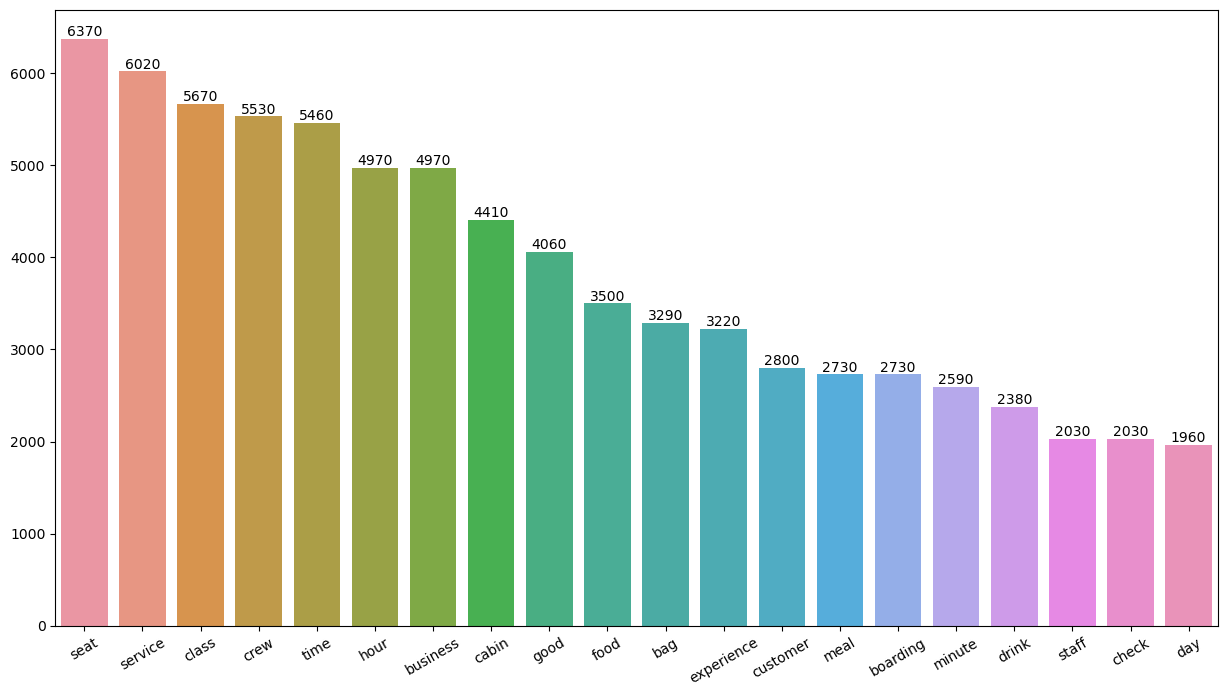

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.savefig('saved_figure.png', bbox_inches = 'tight')

Word Frequency with N-gram

<AxesSubplot:>

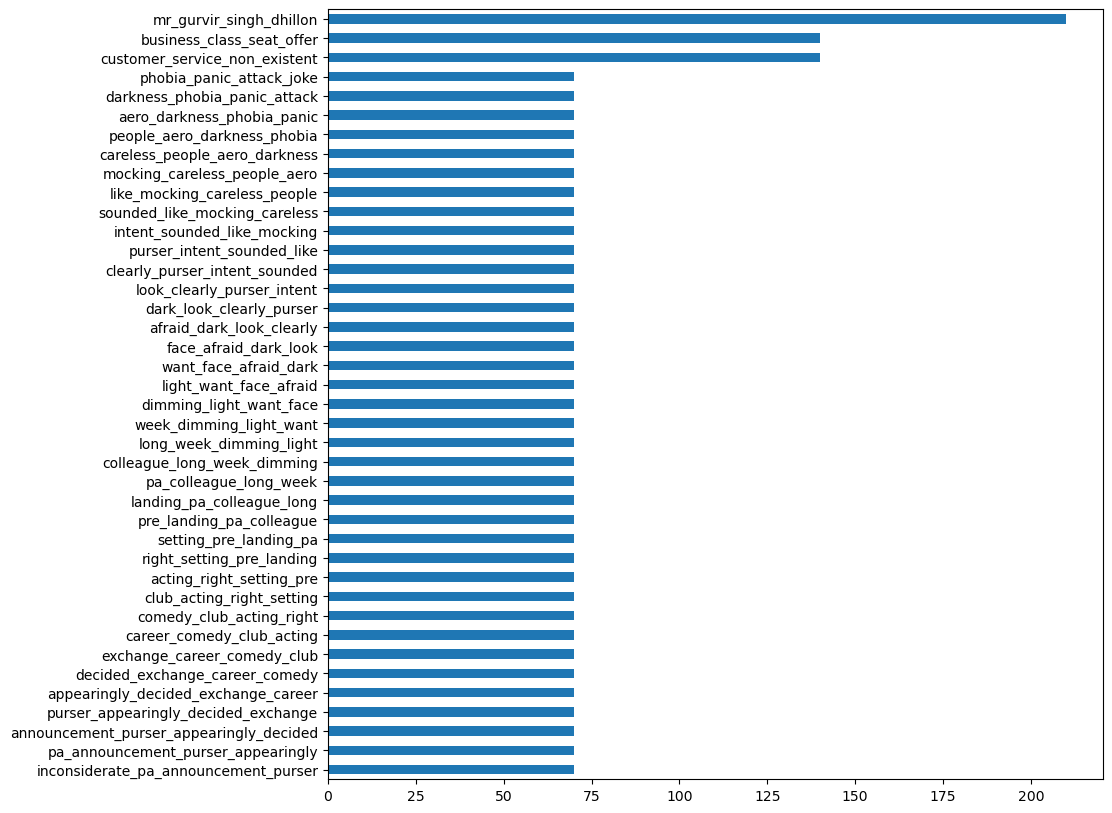

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)


We can see that there are very common negative terms regarding Business class. For example, Business_class_seat_offer, 
customer_service_non_existence, etc. So certainly customers are providing some bad reviews about business class of British Airways.

However, there is one another approach that we can try to find the word frequencies which will give us better idea. We will group the reviews based on ratings. Say, we assume ratigs 1-3 are bad reviews, 4-6 are average/good experience and 7-10 indicates a great experience.

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

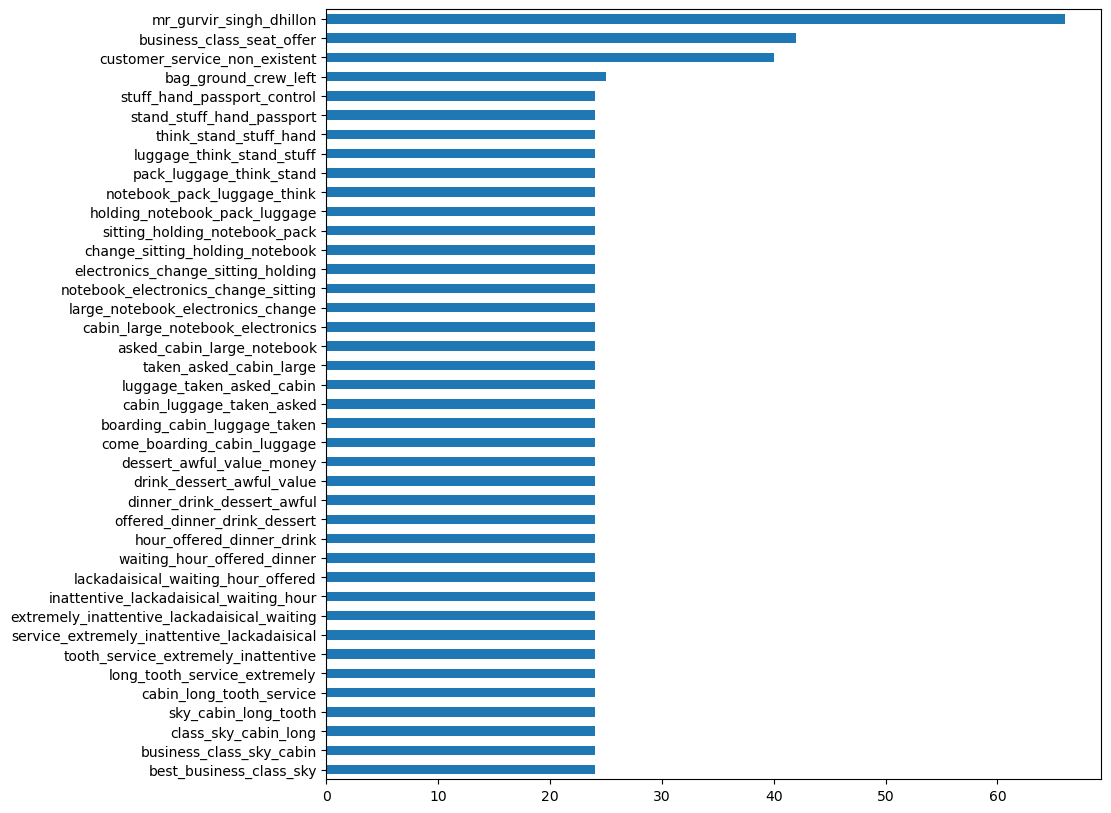

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

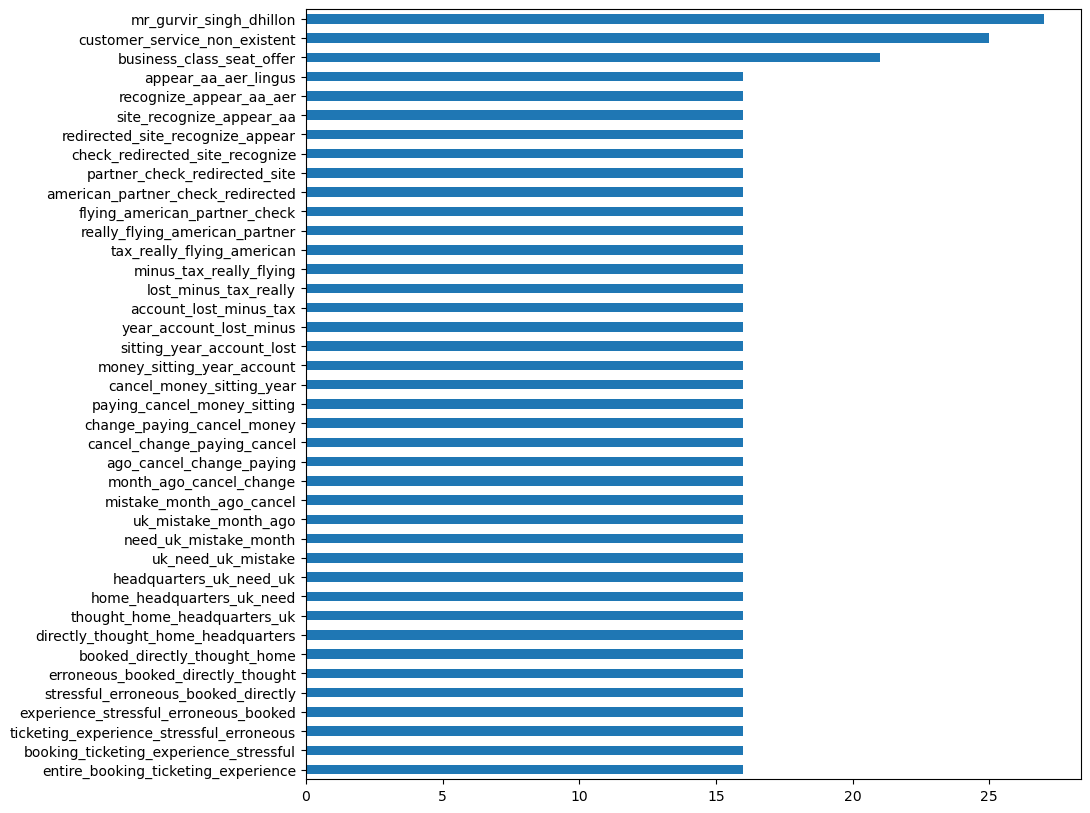

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

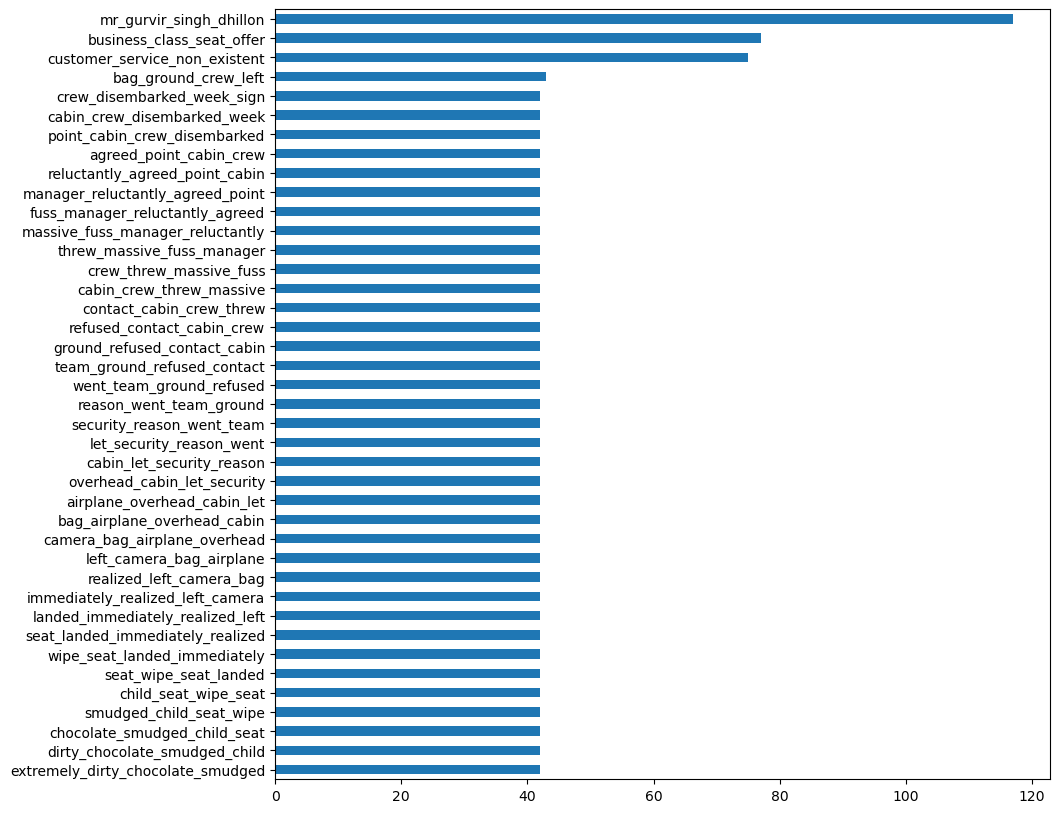

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

Now we will use textblob library to define if the text is negative or positive and to what extent

In [ ]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [ ]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

5320 number of reviews between -0.2 and 0.2 polarity score
2800 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 5320 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [ ]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [ ]:
df.label.value_counts()

 1    4270
-1    2660
 0      70
Name: label, dtype: int64

Topic Modeling with LDA

We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [ ]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [ ]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight          5210.8            ba          1139.1        flight   
1            ba          3308.8        flight           973.7          seat   
2          back          1120.1        airway           951.4          time   
3          hour          1100.7       british           951.4            ba   
4          seat          1062.7       service           868.7          good   
5        london           980.1      customer           793.0       airline   
6       airport           980.1          time           703.8         class   
7           one           980.1          crew           647.3          food   
8       service           893.7      heathrow           630.1      business   
9          crew           879.0          mile           628.1          hour   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          2380.1        flight          1526.4        flight           866.9   
1          1750.1          meal          1400.1            ba           840.0   
2          1470.1          crew          1173.0       service           729.9   
3          1400.1       service          1067.9      customer           683.3   
4          1190.1           one          1008.7           bag           560.1   
5           980.1     passenger           987.3           one           490.1   
6           980.1          nice           910.1    experience           454.2   
7           840.1        option           910.0          hour           453.6   
8           840.1          good           895.3       airline           397.2   
9           700.1            ba           891.3        change           350.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0         class          1186.8        flight          4200.1        flight   
1      business           926.6            ba          3012.3         class   
2        flight           809.5          even          1236.9            ba   
3            ba           749.3          hour          1209.5      business   
4         first           700.1          seat          1149.4         cabin   
5          seat           658.3          crew          1096.6        airway   
6    experience           630.1         cabin          1084.6       british   
7          crew           474.8          time          1023.4          crew   
8          food           461.3      business          1011.5       service   
9           way           442.5         class           967.6         first   

  Topic 7 weights  
0          1673.4  
1          1610.1  
2          1540.1  
3          1330.1  
4          1050.2  
5           938.9  
6           938.9  
7           840.1  
8           763.9  
9           700.1

There are certain words that are not useful to detect the tone of the reviews overall like "britsh airways", "passenger", "flight", etc.

Topic modeling with NMF

In [ ]:

from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.1480237 , 0.26177587],
       [0.07742746, 0.        ],
       [0.89403578, 0.        ],
       ...,
       [0.04997606, 0.        ],
       [0.16664532, 0.07877091],
       [0.47011482, 0.03429923]])

In [ ]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)


In [ ]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            13.9         class             5.7
1            ba             7.1            ba             4.8
2          time             3.5       british             4.5
3          seat             3.4      business             4.4
4           one             3.3        airway             4.2
5          hour             3.3         first             3.4
6     passenger             3.3         cabin             3.1
7          crew             3.1       service             2.1
8       service             3.1        flight             2.1
9          good             3.1      customer             1.9